***Vorlesung 'Syntax natürlicher Sprachen'***

--- 


# FCFG: Modellierung Subkategorisierung über Komplementtypen als Merkmale


In [2]:
import nltk
from nltk import Tree

1


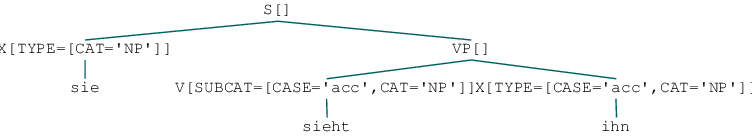

1


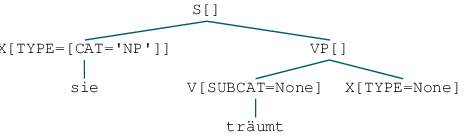

In [3]:
gramstring = r"""
% start S
    
    S   -> X[CAT=NP] VP
    VP  -> V[SUBCAT=?s] X[TYPE=?s]    
   
    X[TYPE=[CAT=NP]]   -> "sie"
    X[TYPE=[CAT=NP, CASE=acc]]   -> "ihn"
    X[TYPE=None]   ->

    V[SUBCAT=[CAT=NP,CASE=acc]]   -> "sieht"
    V[SUBCAT=None]   -> "träumt"
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

    
sent = 'sie sieht ihn'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    #display(tree)    
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)
    
sent = 'sie träumt'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    #display(tree)
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)        

In [4]:
#NEGATIVBEISPIELE:

sent = 'sie sieht'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)
    #display(tree)   
    

sent = 'sie träumt ihn'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    tree.pretty_print(unicodelines=True)
    #display(tree)   
        

0
0


### Ergänzung um Regeln für Objektkomplementsatz (`SBAR`):

1


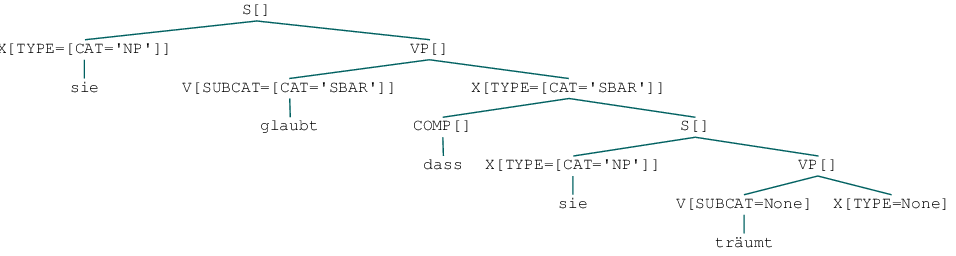

In [5]:
gramstring = r"""
% start S
    
    S   -> X[CAT=NP] VP
    VP  -> V[SUBCAT=?s] X[TYPE=?s]

    X[TYPE=[CAT=SBAR]] -> COMP S
    
   
    X[TYPE=[CAT=NP]]   -> "sie"
    X[TYPE=[CAT=NP, CASE=acc]]   -> "ihn"
    X[TYPE=None]   ->

    V[SUBCAT=[CAT=NP,CASE=acc]]   -> "sieht"
    V[SUBCAT=None]   -> "träumt"

    V[SUBCAT=[CAT=SBAR]]   -> "glaubt"
    COMP   -> "dass"
"""

grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar,trace=0)

sent = 'sie glaubt dass sie träumt'.split()
print(len(list(parser.parse(sent))))

for tree in parser.parse(sent):
    tree = Tree.fromstring(str(tree).replace(", ",","))
    #tree.pretty_print(unicodelines=True)
    display(tree)
